In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata("MNIST original")
Xdig = mnist.data
ydig = mnist.target
Xdigs = Xdig / np.max(Xdig)
Xdigs.shape

(70000, 784)

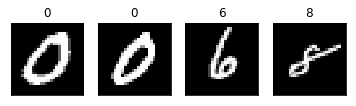

In [4]:
def plt_digit(x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

# Convert data to a matrix
X = Xdigs
y = ydig

# Select random digits
nplt = 4
nsamp = X.shape[0]
Iperm = np.random.permutation(nsamp)

# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt,i+1)
    plt_digit(X[ind,:])
    title ='{0:d}'.format(y[ind].astype(int))
    plt.title(title)

In [5]:
class ImgException(Exception):
    def __init__(self, msg='No msg'):
        self.msg = msg

In [6]:
import matplotlib.image as mpimg
import skimage.io
from skimage.filters import threshold_otsu, threshold_mean
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.transform import resize
import matplotlib.patches as mpatches
from skimage import data
import skimage
import os.path

In [7]:
import tarfile

English = tarfile.open('EnglishHnd.tar')
English.extractall()
English.close()

In [8]:
def load_img(char_ind, samp_ind):
    """
    Returns the image from the dataset given a character and sample index.
    
        
    If the file doesn't exist, it raises an Exception with the filename. 
    """
    
    
    # TODO:  Set the file name based on char_ind and samp_ind
    dname = "Sample0" + str(char_ind)
    if samp_ind < 10:
        fname = "img0" + str(char_ind) + "-00" + str(samp_ind) + ".png"
    else:
        fname = "img0" + str(char_ind) + "-0" + str(samp_ind) + ".png"
  
    
    # TODO:  Use the os.path.isfile command to check if the file exists.  
    # If not raise an ImgException with the message "[fname] not found"
    
    if not os.path.isfile("English/Hnd/Img/" + dname + "/" + fname):
        raise ImgException("File " + fname + " not found")

    # TODO:  Use the skimage.io.imread() command to read the png file and return the image.
    img = skimage.io.imread("English/Hnd/Img/" + dname +"/" + fname)

    return img

Char = 47 samp=6
File img047-070.png not found


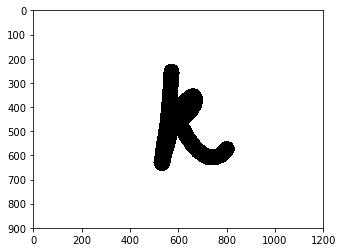

In [9]:
char_ind = 47
samp_inds = [6,70]
for samp_ind in samp_inds:
    try:
        img = load_img(char_ind=char_ind, samp_ind=samp_ind)
        print("Char = %d samp=%d" % (char_ind, samp_ind))
        plt.imshow(img)
    except ImgException as e:
        print(e.msg)

In [10]:
def mnist_resize(img): 
    """ 
    Extracts a character from the image, and places in a 28x28 image to match the MNIST format.
    Returns:
    img1:  MNIST formatted 28 x 28 size image with the character from img
    box:   A bounding box indicating the locations where the character was found in img.    
    """
    # Image sizes (fixed for now).  To match the MNIST data, the image 
    # will be first resized to 20 x 20.  Then, the image will be placed in center of 28 x 28 box
    # offet by 4 on each side.
    nx_img = 20   
    ny_img = 20
    nx_box = 28   
    ny_box = 28
    offx = 4
    offy = 4

    # TODO:  Convert the image to gray scale using the skimage.color.rgb2gray method. 
    bw = skimage.color.rgb2gray(img)

    # Threshold the image using OTSU threshold
    thresh = threshold_otsu(bw)
    bw = closing(bw < thresh, square(3)).astype(int)

    # Get the regions in the image.
    # This creates a list of regions in the image where the digit possibly is.
    regions = regionprops(bw)

    # TODO:  Find region with the largest area.  You can get the region area from region.area.
    for region in regions:
        region_max = region.area 

        # Raise an ImgException if no region with area >= 100 was found
        if (region_max < 100):
            raise ImgException("No image found")    

        # Get the bounding box of the character from region_max.bbox
        minr, minc, maxr, maxc = region.bbox
        box = [minr,minc,maxr,maxc]

        # TODO:  Crop the image in bw to the bounding box
        bw_crop = bw[minr:maxr,minc:maxc]

        # TODO:  Resize the cropped image to a 20x20 using the resize command.
        # You will need to use the mode = 'constant' option
        bw_resize = resize(bw_crop, (nx_img, ny_img),mode='constant')
        #bw_resize = resizeimage.resize_cover(bw_crop, [nx_img, ny_img])

        # TODO:  Threshold back to a 0-1 image by comparing the pixels to their mean value
        thresh = threshold_mean(bw_resize)

        # TODO:  Place extracted 20 x 20 image in larger image 28 x 28
        img1 = np.zeros((nx_box,ny_box))
        img1[4:-4,4:-4] = bw_resize
        #img1 = ImageOps.expand(bw_resize, border=4)
        #img1 = resize(bw_resize, (nx_box, ny_box),mode='constant')

    return img1, box

/Users/Forita/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


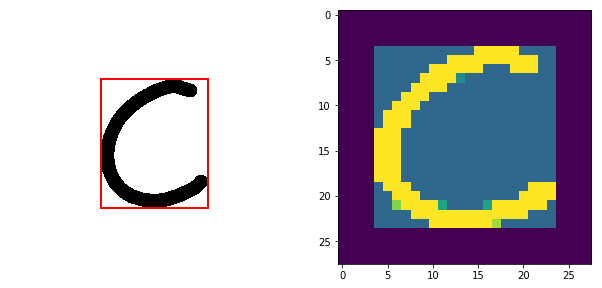

In [11]:
# Load an image
img = load_img(13,9)

try:
    # Resize the image
    img1, box = mnist_resize(img)
    
    # TODO:  Plot the original image, img, along with a red box around the captured character.
    # Use the mpatches.Rectangle and ax.add_patch methods to construct the rectangle.
    #fig,ax  = plt.subplots(figsize=(10,6))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    ax1.imshow(img)
    rect = mpatches.Rectangle((box[1], box[0]), box[3] - box[1], box[2] - box[0],
                                  fill=False, edgecolor='red', linewidth=2)
    ax1.add_patch(rect)
    ax1.set_axis_off()
    ax2.imshow(img1)
    
except ImgException as e:
    print(e.msg)

In [12]:
import random
import string

# Dimensions
nlet = 1000
nrow = 28
ncol = 28
npix = nrow*ncol
Xlet = np.zeros((nlet, npix))

i = 0
while i < nlet:
    # TODO:  Generate a random character and sample 
    char_ind = random.randint(37,62)
    while True:
        char_ind = random.randint(37,62)
        if char_ind != 45 and char_ind != 51:
            break
    samp_ind = random.randrange(0,49)
        
    try:
        # TODO:  Load the image with load_img function
        img = load_img(char_ind,samp_ind)
        
        # TODO:  Reize the image with mnist_resize function
        img1, box = mnist_resize(img)
        
        # TODO:  Store the image in a row of Xlet[i,:] and increment i
        Xlet[i,:] = img1.reshape((1,784))
        i += 1
        
        # Print progress
        if (i % 50 == 0):
            print ('images captured = {0:d}'.format(i))
    except ImgException:
        # Skip if image loading or resizing failed
        pass

/Users/Forita/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


images captured = 50
images captured = 100
images captured = 150
images captured = 200
images captured = 250
images captured = 300
images captured = 350
images captured = 400
images captured = 450
images captured = 500
images captured = 550
images captured = 600
images captured = 650
images captured = 700
images captured = 750
images captured = 800
images captured = 850
images captured = 900
images captured = 950
images captured = 1000


In [13]:
import pickle

with open( "Xlet.p", "wb" ) as fp:
    pickle.dump(Xlet, fp)

In [14]:
with open( "Xlet.p", "rb" ) as fp:
    Xlet = pickle.load(fp)

In [15]:
# Create Extended Training Data
Xlets = 2*Xlet-1
ndig=5000
nlet=1000
nrow = 28
ncol = 28
npix = nrow*ncol
Xsamp = np.zeros((ndig, npix))
ylabel = np.zeros(ndig)
ten = np.ones(nlet)*10

nsamp = Xdigs.shape[0]
Iperm = np.random.permutation(nsamp)
for i in range(ndig):
    ind = Iperm[i]
    Xsamp[i] = Xdigs[ind,:]
    ylabel[i] = ydig[ind]

X = np.concatenate((Xsamp,Xlets),axis=0)
y = np.concatenate((ylabel,ten),axis=0)

nsamp = X.shape[0]
Iperm = np.random.permutation(nsamp)
for i in range(ndig+nlet):
    ind = Iperm[i]
    X[i] = X[ind,:]
    y[i] = y[ind]

In [16]:
from sklearn import svm

# Create a classifier: a support vector classifier
svc = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)

In [17]:
# TODO
ntr = 5000
nts = 1000
Xtr = X[:ntr,:]
ytr = y[:ntr]
Xts = X[ntr:,:]
yts = y[ntr:]

In [18]:
svc.fit(Xtr,ytr)

[LibSVM]

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0073, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=10)

In [19]:
yhat_ts = svc.predict(Xts)
acc = np.mean(yhat_ts == yts)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.996000


[[ 1.      0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.      1.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.      0.      1.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.      0.      0.      1.      0.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.      0.      0.      0.      1.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.      0.      0.      0.      0.      1.      0.      0.      0.      0.
   0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.      0.      0.      0.
   0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.9756  0.
   0.0282  0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      1.      0.
   0.    ]
 [ 0.      0.      0.      0.      0.      0.0164  0.      0.0122  0.
   0.9718  0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
   1.    ]]


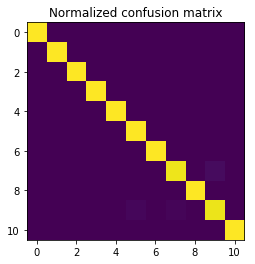

In [20]:
from sklearn.metrics import confusion_matrix

# confusion matrix
C0 = confusion_matrix(yts, yhat_ts)
C = C0 / C0.astype(np.float).sum(axis=1)
print(np.array_str(C, precision=4, suppress_small=True))
plt.imshow(C, interpolation='None')
plt.title('Normalized confusion matrix')

In [21]:
Ierr = np.where((yhat_ts == 10) & (yts != 10))[0]
if len(Ierr) == 0:
    print("No such error found") 
else:
    if len(Ierr) > 4:
        nplt = 4
    else:
        nplt = len(Ierr)
    plt.figure(figsize=(10, 4))
    for i in range(nplt):        
        plt.subplot(1,nplt,i+1)        
        ind = Ierr[i]    
        plt_digit(Xts[ind,:])        
        title = 'true={0:d} est={1:d}'.format(yts[ind].astype(int), yhat_ts[ind].astype(int))
        plt.title(title)

No such error found


In [22]:
Ierr = np.where((yhat_ts != 10) & (yts == 10))[0]
if len(Ierr) == 0:
    print("No such error found") 
else:
    if len(Ierr) > 4:
        nplt = 4
    else:
        nplt = len(Ierr)
    plt.figure(figsize=(10, 4))
    for i in range(nplt):        
        plt.subplot(1,nplt,i+1)        
        ind = Ierr[i]    
        plt_digit(Xts[ind,:])        
        title = 'true={0:d} est={1:d}'.format(yts[ind].astype(int), yhat_ts[ind].astype(int))
        plt.title(title)

No such error found


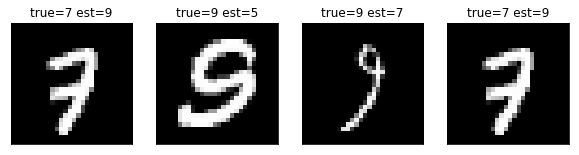

In [23]:
Ierr = np.where((yhat_ts != yts) & (yts < 10) & (yhat_ts < 10))[0]
if len(Ierr) == 0:
    print("No such error found") 
else:
    if len(Ierr) > 4:
        nplt = 4
    else:
        nplt = len(Ierr)
    plt.figure(figsize=(10, 4))
    for i in range(nplt):        
        plt.subplot(1,nplt,i+1)        
        ind = Ierr[i]    
        plt_digit(Xts[ind,:])        
        title = 'true={0:d} est={1:d}'.format(yts[ind].astype(int), yhat_ts[ind].astype(int))
        plt.title(title)